In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt; alt.data_transformers.disable_max_rows()
import torch
from ipywidgets import interact

# Leer datos

In [2]:
# Data types
train_dtypes = {'time': np.float32, 'signal': np.float32, 'open_channels': np.int32 }
test_dtypes  = {'time': np.float32, 'signal': np.float32 }

# Read data
df_train       = pd.read_csv('data/train.csv',             dtype= train_dtypes)
df_test        = pd.read_csv('data/test.csv',              dtype= test_dtypes)
df_train_drift = pd.read_csv('data/train_clean.csv',       dtype= train_dtypes)
df_test_drift  = pd.read_csv('data/test_clean.csv',        dtype= test_dtypes)
sub            = pd.read_csv('data/sample_submission.csv', dtype={'time': np.float32})

# Poner el drift bien

In [3]:
df_train['drift'] = df_train['signal'] - df_train_drift['signal']
df_test['drift']  = df_test['signal']  - df_test_drift['signal']

train_drift       = np.zeros_like(df_train['drift'])
test_drift        = np.zeros_like(df_test['drift'])

train_drift[1:]   = df_train['drift'][:-1]
test_drift[1:]    = df_test['drift'][:-1]

df_train['signal'] = df_train['signal']-train_drift
df_test['signal']  = df_test['signal']-test_drift

In [4]:
tr0 = df_train[      0: 500000]
tr1 = df_train[ 500000:1000000]
tr2 = df_train[1000000:1500000]
tr3 = df_train[1500000:2000000]
tr4 = df_train[2000000:2500000]
tr5 = df_train[2500000:3000000]
tr6 = df_train[3000000:3500000]
tr7 = df_train[3500000:4000000]
tr8 = df_train[4000000:4500000]
tr9 = df_train[4500000:5000000]

te01 = df_test[      0: 100000]
te02 = df_test[ 100000: 200000]
te03 = df_test[ 200000: 300000]
te04 = df_test[ 300000: 400000]
te05 = df_test[ 400000: 500000]
te11 = df_test[ 500000: 600000]
te12 = df_test[ 600000: 700000]
te13 = df_test[ 700000: 800000]
te14 = df_test[ 800000: 900000]
te15 = df_test[ 900000:1000000]
te2  = df_test[1000000:1500000]
te3  = df_test[1500000:2000000]

assert(len(df_train) == len(tr0)+len(tr1)+len(tr2)+len(tr3)+len(tr4)+len(tr5)+len(tr6)+len(tr7)+len(tr8)+len(tr9))

# TRAIN Y

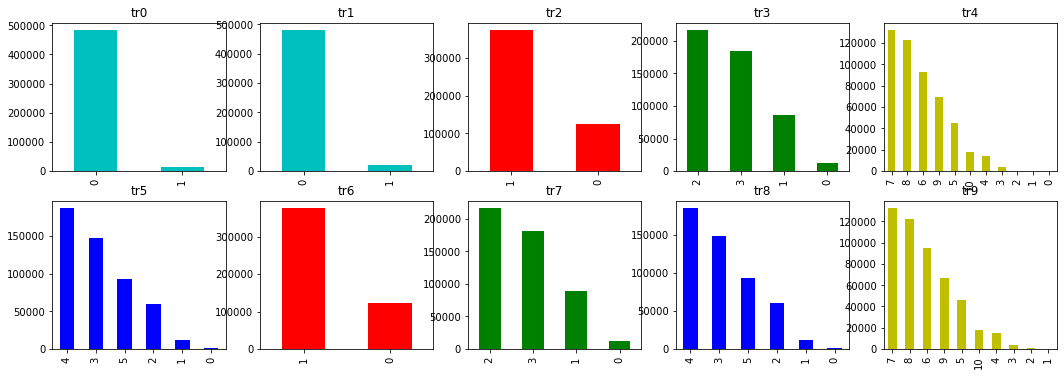

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(18, 6))

tr0["open_channels"].value_counts().plot.bar(title="tr0",color="c", ax=ax[0][0])
tr1["open_channels"].value_counts().plot.bar(title="tr1",color="c", ax=ax[0][1])
tr2["open_channels"].value_counts().plot.bar(title="tr2",color="r", ax=ax[0][2])
tr3["open_channels"].value_counts().plot.bar(title="tr3",color="g", ax=ax[0][3])
tr4["open_channels"].value_counts().plot.bar(title="tr4",color="y", ax=ax[0][4])
tr5["open_channels"].value_counts().plot.bar(title="tr5",color="b", ax=ax[1][0])
tr6["open_channels"].value_counts().plot.bar(title="tr6",color="r", ax=ax[1][1])
tr7["open_channels"].value_counts().plot.bar(title="tr7",color="g", ax=ax[1][2])
tr8["open_channels"].value_counts().plot.bar(title="tr8",color="b", ax=ax[1][3])
tr9["open_channels"].value_counts().plot.bar(title="tr9",color="y", ax=ax[1][4]);

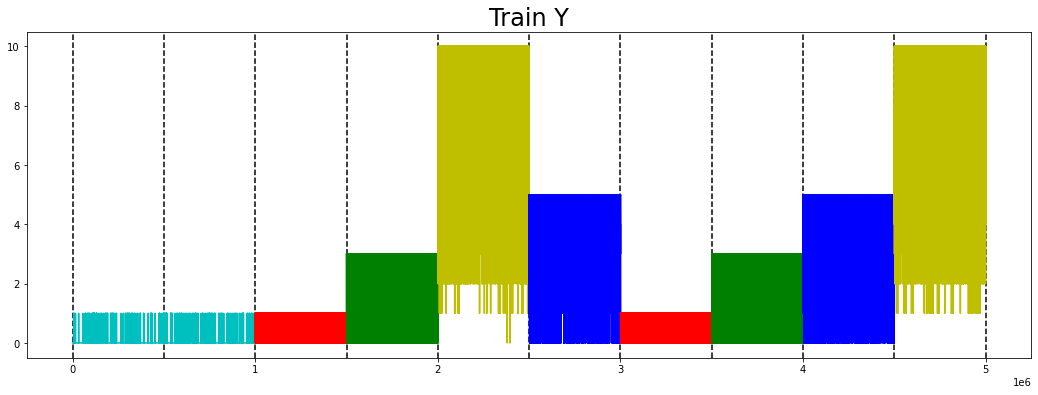

In [6]:
plt.figure(figsize=(18, 6))
[plt.axvline(i, color='k', linestyle='--') for i in range(0,5000001,500000)]

tr0["open_channels"].plot.line(c="c");
tr1["open_channels"].plot.line(c="c");
tr2["open_channels"].plot.line(c="r");
tr3["open_channels"].plot.line(c="g");
tr4["open_channels"].plot.line(c="y");
tr5["open_channels"].plot.line(c="b");
tr6["open_channels"].plot.line(c="r");
tr7["open_channels"].plot.line(c="g");
tr8["open_channels"].plot.line(c="b");
tr9["open_channels"].plot.line(c="y");
plt.title("Train Y",fontsize=24);

# TRAIN X

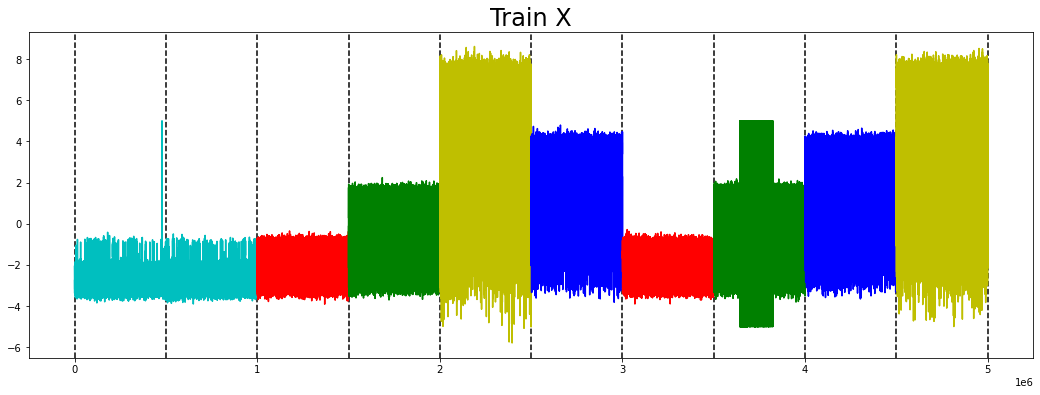

In [7]:
plt.figure(figsize=(18, 6))
[plt.axvline(i, color='k', linestyle='--') for i in range(0,5000001,500000)]

tr0["signal"].plot.line(c="c");
tr1["signal"].plot.line(c="c");
tr2["signal"].plot.line(c="r");
tr3["signal"].plot.line(c="g");
tr4["signal"].plot.line(c="y");
tr5["signal"].plot.line(c="b");
tr6["signal"].plot.line(c="r");
tr7["signal"].plot.line(c="g");
tr8["signal"].plot.line(c="b");
tr9["signal"].plot.line(c="y");
plt.title("Train X",fontsize=24);

# TEST X
### Public LB is first 600k points (from light blue to first yellow)

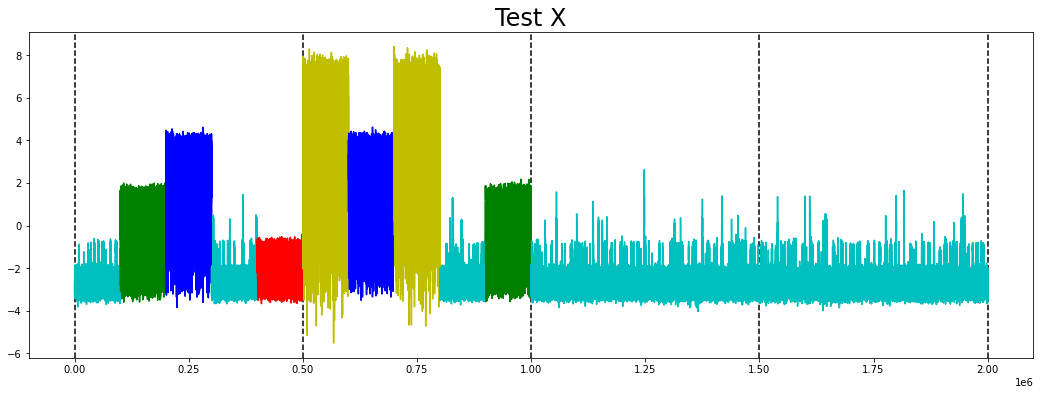

In [8]:
plt.figure(figsize=(18, 6))
[plt.axvline(i, color='k', linestyle='--') for i in range(0,2000001,500000)]

te01["signal"].plot.line(c="c");
te02["signal"].plot.line(c="g");
te03["signal"].plot.line(c="b");
te04["signal"].plot.line(c="c");
te05["signal"].plot.line(c="r");
te11["signal"].plot.line(c="y");
te12["signal"].plot.line(c="b");
te13["signal"].plot.line(c="y");
te14["signal"].plot.line(c="c");
te15["signal"].plot.line(c="g");
te2["signal"].plot.line(c="c");
te3["signal"].plot.line(c="c");
plt.title("Test X",fontsize=24);

# Histograms

In [9]:
train_gr1 = pd.concat([df_train[      0: 500000], df_train[ 500000:1000000]])
train_gr2 = pd.concat([df_train[1000000:1500000], df_train[3000000:3500000]])
train_gr3 = pd.concat([df_train[1500000:2000000], df_train[3500000:4000000]])
train_gr4 = pd.concat([df_train[2500000:3000000], df_train[4000000:4500000]])
train_gr5 = pd.concat([df_train[2000000:2500000], df_train[4500000:5000000]])

test_gr1 = pd.concat([df_test[:100000], df_test[300000:400000], df_test[800000:900000], df_test[1000000:2000000]])
test_gr2 = df_test[400000:500000]
test_gr3 = pd.concat([df_test[100000:200000], df_test[900000:1000000]])
test_gr4 = pd.concat([df_test[200000:300000], df_test[600000:700000]])
test_gr5 = pd.concat([df_test[500000:600000], df_test[700000:800000]])

In [10]:
df_train["signal"].min(), df_train["signal"].max()

(-5.7965, 8.6131)

In [11]:
df_test["signal"].min(), df_test["signal"].max()

(-5.5096, 8.402788)

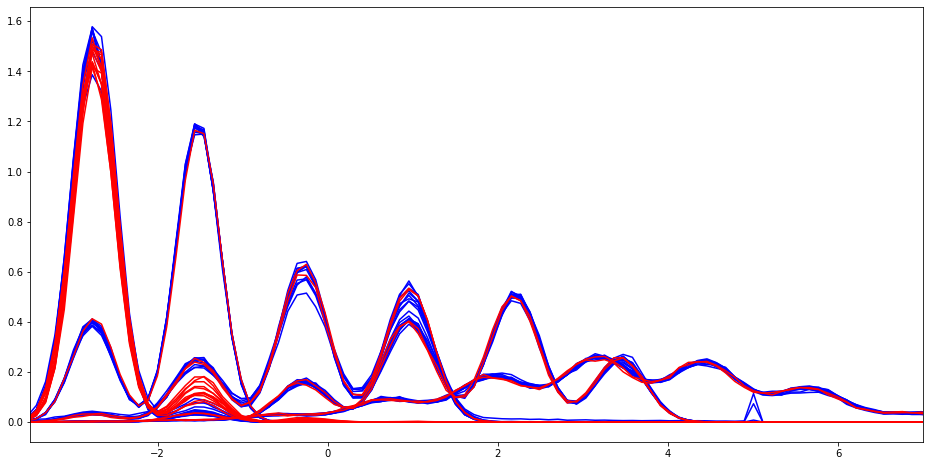

In [12]:
#np.histogram(train_gr1, bins=200, range=(-5.5096, 8.402788), density=True)[0]
#plt.hist(train_gr1)

HIST_BINS=128

def plot_hist_train_test(df_train, df_test, num_hist, xlim=(-4,1)):

    num_segments_train = len(df_train) // 100000
    num_segments_test  = len(df_test)  // 100000
    
    eje_x = np.linspace(-5.5096, 8.402788, num=num_hist)
    
    plt.figure(figsize=(16, 8))
    for x in np.split(df_train["signal"].values, num_segments_train):
        hist = np.histogram(x, bins=num_hist, range=(-5.5096, 8.402788), density=True)[0]
        plt.plot(eje_x, hist, c="b")

    for x in np.split(df_test["signal"].values, num_segments_test):
        hist = np.histogram(x, bins=num_hist, range=(-5.5096, 8.402788), density=True)[0]
        plt.plot(eje_x, hist, c="r")

    plt.xlim(xlim)
    plt.show()
    
plot_hist_train_test(df_train, df_test, num_hist=HIST_BINS, xlim=(-3.5,7))

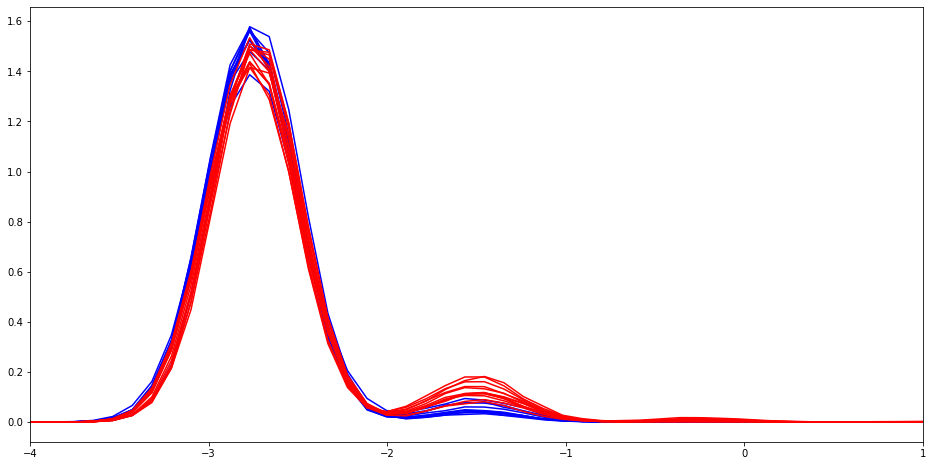

In [111]:
plot_hist_train_test(train_gr1, test_gr1, num_hist=HIST_BINS, xlim=(-4,1))

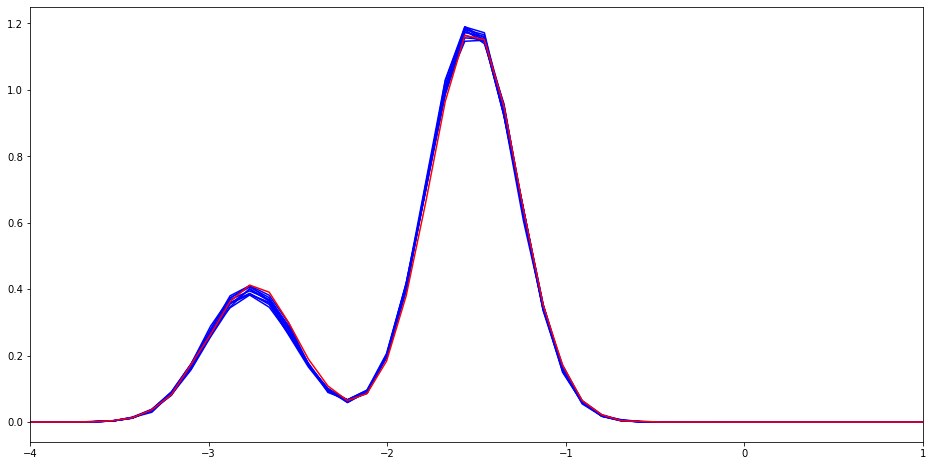

In [107]:
plot_hist_train_test(train_gr2, test_gr2, num_hist=HIST_BINS, xlim=(-4,1))

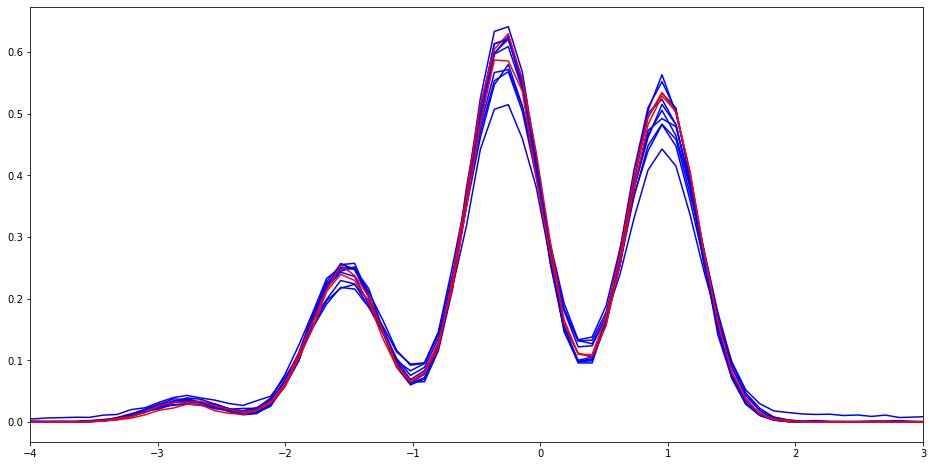

In [108]:
plot_hist_train_test(train_gr3, test_gr3, num_hist=HIST_BINS, xlim=(-4,3))

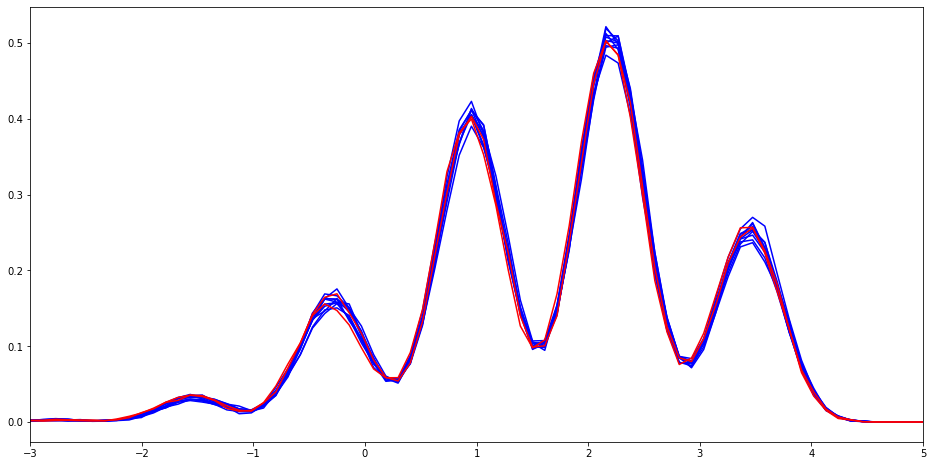

In [109]:
plot_hist_train_test(train_gr4, test_gr4, num_hist=HIST_BINS, xlim=(-3,5))

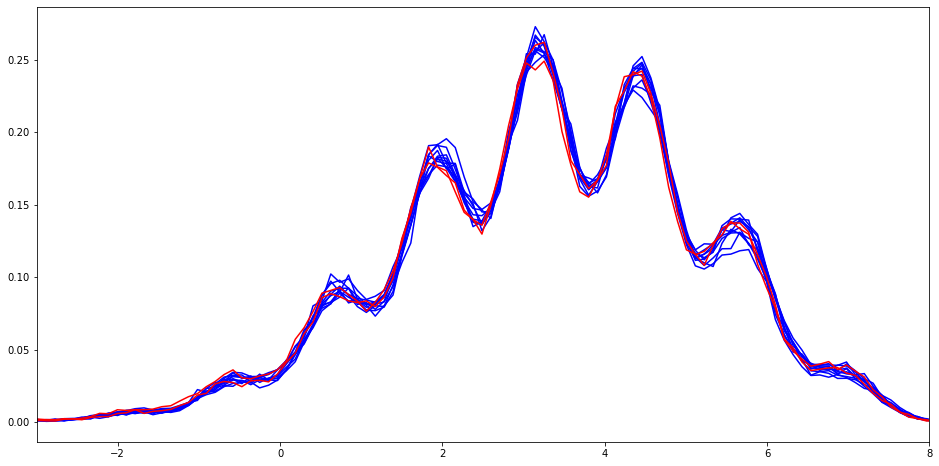

In [134]:
plot_hist_train_test(train_gr5, test_gr5, num_hist=HIST_BINS, xlim=(-3,8))

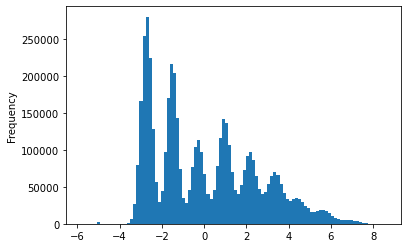

In [131]:
df_train["signal"].plot.hist(bins=100);

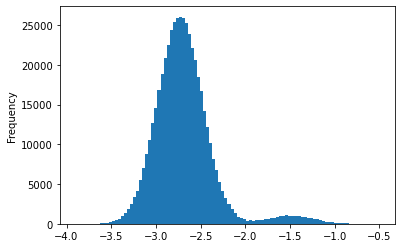

In [13]:
tr1["signal"].plot.hist(bins=100);

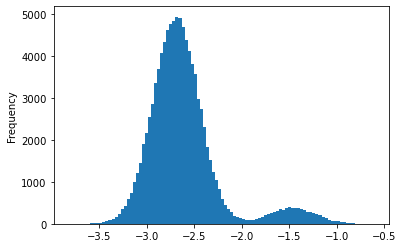

In [11]:
te01["signal"].plot.hist(bins=100);

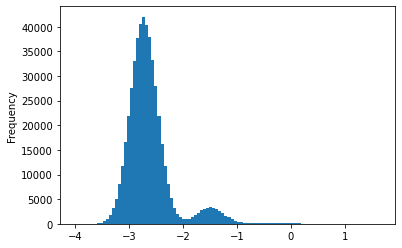

In [15]:
te3["signal"].plot.hist(bins=100);

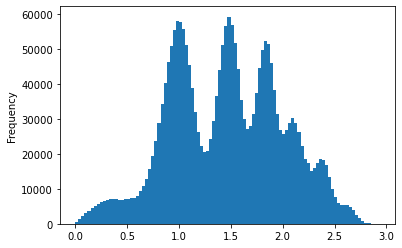

In [60]:
(train["signal"]**0.5).plot.hist(bins=100);

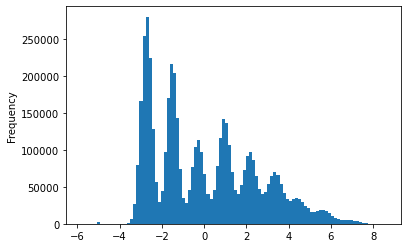

In [61]:
(train["signal"]).plot.hist(bins=100);

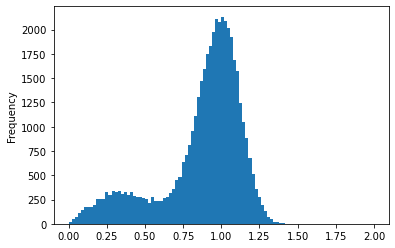

In [63]:
(te02["signal"]**0.5).plot.hist(bins=100);

# Batches

In [13]:
def plot_xy_batch(t):
    plt.figure(figsize=(18, 6))
    t["signal"].plot.line();
    t["open_channels"].plot.line();

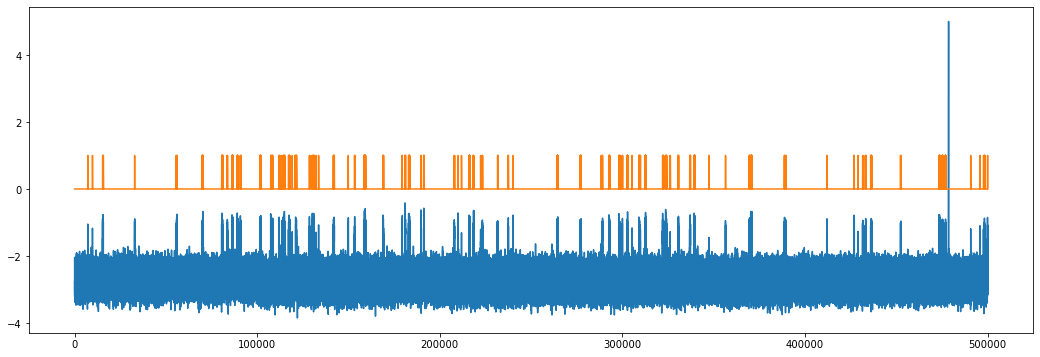

In [14]:
plot_xy_batch(tr0)

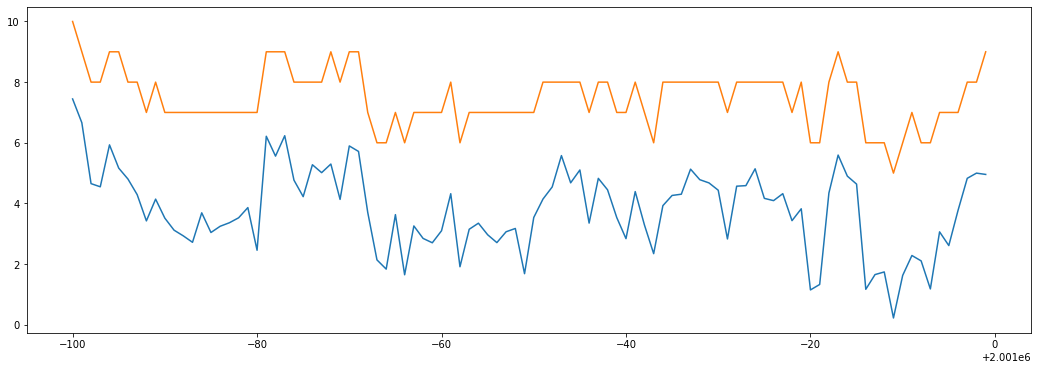

In [32]:
plt.figure(figsize=(18, 6))
train[2000900:2001000]["signal"].plot.line();
train[2000900:2001000]["open_channels"].plot.line();